# Optimisation Bayésienne et Modèles Bayésiens à Noyau

## Partie 1 : Optimisation Bayésienne

### Fondements théoriques : 

#### Principe de l'optimisation bayésienne

L'optimisation bayésienne sert à trouver des valeurs optimales d'une fonction couteuse ou complexe avec 3 étapes:
1. Construction d'un modèle probabliliste ( souvent un processus gaussien) qui estime la valeur attendue et l'incertitude de la fonction
2. Utilisation d'une fonction d'acquisition pour séléctionner le prochain point à tester tout en équilibrant :
    - Exploitation ( tester des points prometteurs)
    - Exploration ( tester des points très incertains)
3. Mis à jour du modèle après chaque nouvelle évaluation et répétition du processus jusqu'a trouver l'optimum

**Ce processus est idéal car il effectue l'exploration à partir des calculs déja faite pour guider l'exploration ainsi il minimise le temps de calcul.**

#### Définition et Explication du processus gaussiens.

Un processus gaussien est une générlisation d'une distribution normale( gaussienne) à une infinité de variables. Autrement dit, il permet de décrire une distribution sur les fonctions entières plutôt que sur de simples variables ponctuelles.

En Machine learning, il se définit par une mèthode non supervisé , non paramètrique permettant de résoudre une régression et des problèmes de classification.

Les avantages des processus gaussiens sont : 
- les prédictions sont interpolés dans l'oberservations ( pour les noyaux classiques )
- Utilisation de différents noyaux possibles
- Les prédictions sont probabilistiques.

Les désavantages das processus gaussiens sont : 

- Notre implémentations doit utiliser toute l'échantillon pour performer la prédiction.
- Pert de l'efficacité dans les hautes dimensions, quand les nombres de caractéristiques excédent la dizaine.

**Les processus gaussiens sont utiles pour modèliser la fonction objective car ils estiment à la fois l'incertitude et la valeur de la fonction ce qui optimise la recherche.**

#### Description des principales fonctions d'acquisitions ( Excepted Improvement, Upper Confidence Bound,..)


- Expected Improvement ( EI ):
Calcule l'amélioration attendue d'un point potentiel par rapport au meilleur résultat déja obtenu. Très souvent utilisé quand l'objectif principal est d'améliorer directement le meilleur résultat trouvé.

- Probability of Improvement (PI):
Calcule la probabilité que la valeur au point testé depasse la meilleur valeur observée actuelle.
Utile si on veut privilégier fortement l'exploitation, quand les évaluations coûtent très cher et qu'on veut éviter les risques inutiles.

- Upper Confidence Bound (UCB):
Définit une valeur optimiste de la prédiction en combinant la moyenne et l'incertitude.
Utile quand on veut contrôler le compromis exploration / exploitation à travers un paramètre (k)

le compromis Exploitation(focus sur l'optimum) et Exploration(réduction d'incertitude) 
- EI : Equilibré et automatique.
- PI : Exploitation est dominante.
- UCB : Les deux sont paramètrables.

### Implémentation et applications
#### Implémentation d'une optimisation bayésienne pour maximiser la production agricole en fonction de l'humidité et de la température

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
file_path= './tp2_atdn_donnees.csv'
df= pd.read_csv(file_path,sep=',')

# Analyse des données et visualisations de la repartitions.

for coloums in [df['Humidité (%)'],df['Température (°C)'],df['Rendement agricole (t/ha)']]: 
    nom = coloums.name
    moyenne = coloums.mean()
    mediane = coloums.median()
    ecart_type = coloums.std()
    variance = coloums.var()
    q1 = coloums.quantile(0.25)
    q3 = coloums.quantile(0.75)
    print(" _______________________________________________________________ ")
    print(f"Moyenne de  {nom} : {moyenne}")
    print(f"Médiane de  {nom} : {mediane}")
    print(f"Ecart-type de  {nom} : {ecart_type}")
    print(f"Variance de  {nom} : {variance}")
    print(f"Premier quartile de  {nom} : {q1}")
    print(f"Troisième quartile de  {nom} : {q3}")

 _______________________________________________________________ 
Moyenne de  Humidité (%) : 59.91370273404084
Médiane de  Humidité (%) : 60.78982490138678
Ecart-type de  Humidité (%) : 17.92130450469554
Variance de  Humidité (%) : 321.17315515002076
Premier quartile de  Humidité (%) : 44.47678145052491
Troisième quartile de  Humidité (%) : 75.36749289140273
 _______________________________________________________________ 
Moyenne de  Température (°C) : 22.04878486015633
Médiane de  Température (°C) : 21.795539170751972
Ecart-type de  Température (°C) : 7.137336422147008
Variance de  Température (°C) : 50.94157120290625
Premier quartile de  Température (°C) : 15.727481195008668
Troisième quartile de  Température (°C) : 28.158420508554272
 _______________________________________________________________ 
Moyenne de  Rendement agricole (t/ha) : 6.758773174731134
Médiane de  Rendement agricole (t/ha) : 6.781865677326724
Ecart-type de  Rendement agricole (t/ha) : 1.207357667594644
Variance 

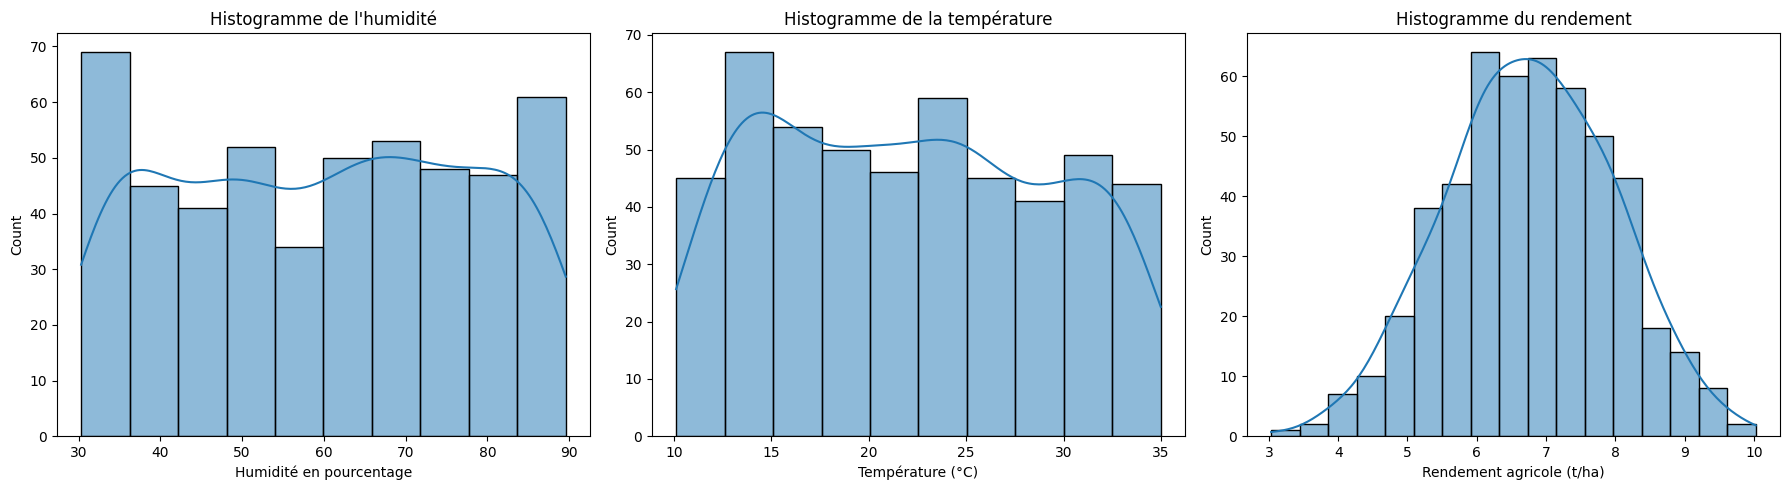

In [54]:
# Création des histogrammes
fig1, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Humidité (%)"],kde=True, ax=axes[0])
axes[0].set_title("Histogramme de l'humidité")
axes[0].set_xlabel("Humidité en pourcentage")

sns.histplot(df["Température (°C)"], kde=True, ax=axes[1])
axes[1].set_title("Histogramme de la température")
axes[1].set_xlabel("Température (°C)")

sns.histplot(df["Rendement agricole (t/ha)"], kde=True, ax=axes[2])
axes[2].set_title("Histogramme du rendement")
axes[2].set_xlabel("Rendement agricole (t/ha)")


plt.tight_layout()
plt.show()

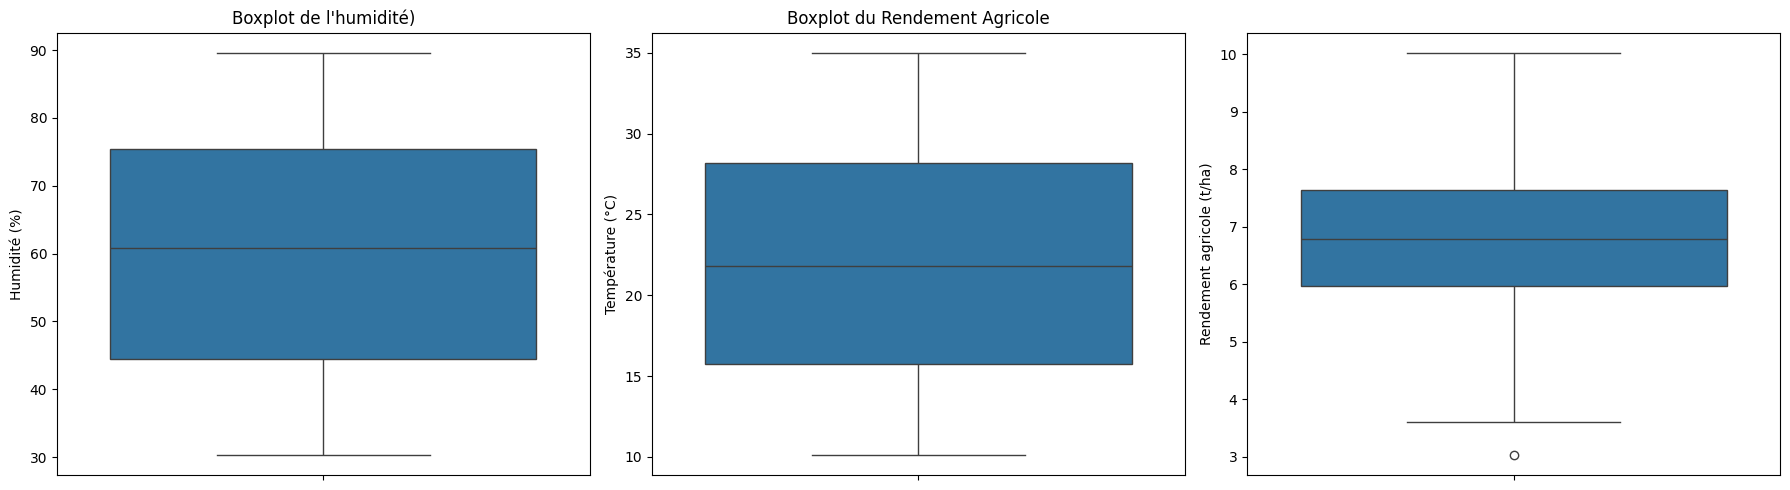

In [55]:
fig2, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df["Humidité (%)"], ax=axes[0],vert=True)
axes[0].set_title("Boxplot de l'humidité)")

sns.boxplot(y=df["Température (°C)"], ax=axes[1])
axes[1].set_title("Boxplot de la température C")

sns.boxplot(y=df["Rendement agricole (t/ha)"], ax=axes[2])
axes[1].set_title("Boxplot du Rendement Agricole")

plt.tight_layout()
plt.show()

On ne observe pas de données anormales ni outliers visuellement et données semblent déja prétraité.

In [56]:
from bayes_opt import BayesianOptimization as BO

# On crée un fonction production et on fixe nos optimums pour l'humidité et temperature
# On le fait selon le doc du libraire github
# On peut fixer l'humidité à 75% et Temperature à 25 degrés par exemple
def production( humidite, temperature):

    return -(humidite - 75)**2 - (temperature - 25) **2 + 1000

# On définit les bornes pour nos paramètres de humidités et température
# humidité de 20 à 100 % et temperature de 0 à 45 degrés, on s'est adapté par rapport aux données
pbounds = { 'humidite' : (20,100), 'temperature' : ( 0,45)} 

# Initialisation de l'optimisateur avec f = fonction à maximiser 
optimizer = BO(f=production,pbounds=pbounds,random_state=42)

# Optimization : avec init_points : Nombre d'évaluations initiales et n_iter : Nombre d'itérations d'optimisation
optimizer.maximize( init_points = 5 , n_iter= 25)

# Affichage du meilleur résultat :
print("Meilleur résultat trouvé :", optimizer.max)

|   iter    |  target   | humidite  | temper... |
-------------------------------------------------
| 1         | 56.95     | 49.96     | 42.78     |
| 2         | 983.6     | 78.56     | 26.94     |
| 3         | -1.131e+0 | 32.48     | 7.02      |
| 4         | -1.731e+0 | 24.65     | 38.98     |
| 5         | 905.1     | 68.09     | 31.86     |
| 6         | -17.84    | 99.98     | 44.85     |
| 7         | 978.8     | 78.37     | 28.14     |
| 8         | -194.7    | 99.75     | 0.8713    |
| 9         | 339.3     | 68.9      | 0.03124   |
| 10        | 600.6     | 71.83     | 44.73     |
| 11        | 943.2     | 69.73     | 19.61     |
| 12        | 997.2     | 73.39     | 25.5      |
| 13        | 940.2     | 77.18     | 17.58     |
| 14        | 995.4     | 75.32     | 22.87     |
| 15        | 998.6     | 75.49     | 26.08     |
| 16        | 1e+03     | 75.07     | 24.83     |
| 17        | 999.9     | 74.85     | 24.77     |
| 18        | 999.6     | 75.6      | 24.96     |


#### Utilisation de l'optimisation bayésienne pour ajuster les hyperparamètres d'un modèle de régression,ici random forest, sur les données agricoles.


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Définition des variables cibles
X = df[['Humidité (%)', 'Température (°C)']]
# On applique le One-Hot Encoding sur les colonnes non numériques
X = pd.get_dummies(X)

y = df['Rendement agricole (t/ha)']

# Définition d'un jeu d'entraînement et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def random_forest(n_estimators, max_depth, max_features):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Prédiction
    y_pred = model.predict(X_test) 

    # Calcul du score (nous voulons maximiser, donc on retourne l'opposé de MSE)
    score = -mean_squared_error(y_test, y_pred)
    return score

pbounds = {
    'n_estimators': (50, 300),
    'max_depth': (5, 30),
    'max_features': (0.1, 0.999)
}

from bayes_opt import BayesianOptimization as BO
optimizer = BO(
    f=random_forest,
    pbounds=pbounds,
    random_state=42,
    verbose=2
) 

# Lancement de l'optimisation 
optimizer.maximize(init_points=10, n_iter=30)
print(optimizer.max)


|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
| 1         | -0.9885   | 14.36     | 0.9547    | 233.0     |
| 2         | -0.9813   | 19.97     | 0.2403    | 89.0      |
| 3         | -0.8752   | 6.452     | 0.8787    | 200.3     |
| 4         | -0.9763   | 22.7      | 0.1185    | 292.5     |
| 5         | -0.9737   | 25.81     | 0.2909    | 95.46     |
| 6         | -0.9504   | 9.585     | 0.3735    | 181.2     |
| 7         | -0.9776   | 15.8      | 0.3618    | 203.0     |
| 8         | -0.9477   | 8.487     | 0.3626    | 141.6     |
| 9         | -0.9735   | 16.4      | 0.8059    | 99.92     |
| 10        | -0.9808   | 17.86     | 0.6326    | 61.61     |
| 11        | -0.8752   | 6.061     | 0.3385    | 200.4     |
| 12        | -0.8739   | 6.125     | 0.295     | 194.8     |
| 13        | -0.9875   | 29.85     | 0.6064    | 155.7     |
| 14        | -0.8585   | 5.204     | 0.938     | 211.1     |
| 15    

In [61]:
from random import uniform,randint

n_iter = 50
best_score_random= -np.inf
best_params_random= None

for i in range(n_iter):
    # on echantillonne aléatoirement dans les intervalles défini
    n_estimators = randint(50,300)
    max_depth= randint(5,30)
    max_features = uniform(0.1,0.999) # uniforme sur 0.1 et 0.999

    model = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,
    max_features=max_features,random_state=42)

    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score = - mean_squared_error(y_test,y_pred)

    if score > best_score_random:
        best_score_random = score
        best_params_random = {'n_estimators': n_estimators,'max_depth': max_depth,'max_features': max_features}

print("\nRésultat du Random Search manuel :")
print("Meilleurs hyperparamètres :", best_params_random)
print("Score (neg MSE) :", best_score_random)    


Résultat du Random Search manuel :
Meilleurs hyperparamètres : {'n_estimators': 116, 'max_depth': 5, 'max_features': 0.5241950457572079}
Score (neg MSE) : -0.8522684840159167


In [62]:
import itertools

# Définition d'une grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_features': [0.1, 0.5, 0.9, 0.999]
}

best_score_grid = -np.inf
best_params_grid = None

# Parcours de toutes les combinaisons possibles
for n_estimators, max_depth, max_features in itertools.product(
    param_grid['n_estimators'],param_grid['max_depth'],param_grid['max_features']):
    model = RandomForestRegressor(
    n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = -mean_squared_error(y_test, y_pred)
    
    if score > best_score_grid:
        best_score_grid = score
        best_params_grid = {
        'n_estimators': n_estimators,'max_depth': max_depth,'max_features': max_features}

print("\nRésultat du Grid Search  :")
print("Meilleurs hyperparamètres :", best_params_grid)
print("Score (neg MSE) :", best_score_grid)



Résultat du Grid Search  :
Meilleurs hyperparamètres : {'n_estimators': 100, 'max_depth': 5, 'max_features': 0.1}
Score (neg MSE) : -0.8531238857654705


Score de -0.850 (Optimisation bayésienne) est légèrement meilleur que -0.852(Random Search) précédé de -0.853 (Grid Search) . Ici plus on est proche de 0 plus c'est efficace.


#### Visualisation du processus d'optimisation ( courbe de convergence , choix des points)

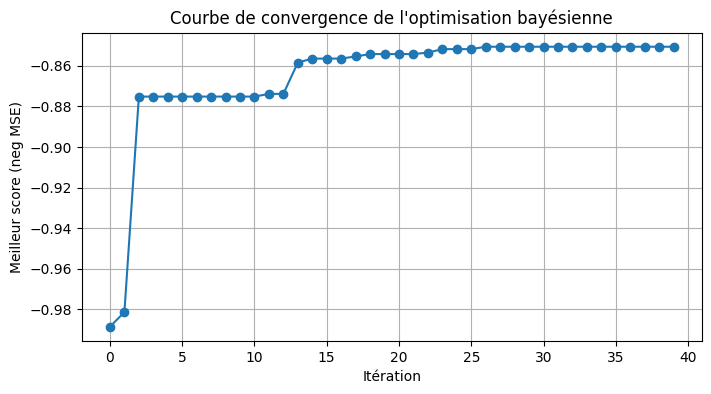

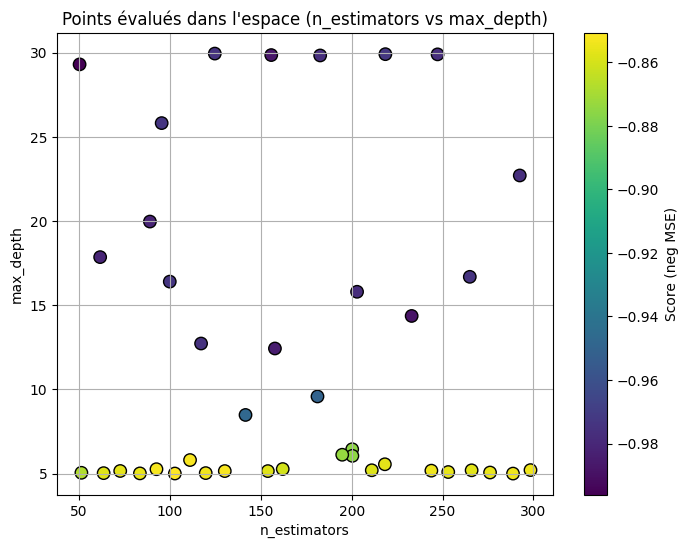

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Extraction des scores (target) et des hyperparamètres depuis optimizer.res
# optimizer.res : liste de dictionnaires avec des clés 'target' et 'params'
results = optimizer.res

# Nombre d'itérations 
iterations = np.arange(len(results))

# Extraction des valeurs de score pour chaque itération 
scores = [res['target'] for res in results]

# Calcul de la meilleure performance cumulée jusqu'à chaque itération
meilleur = []
meilleur_actuelle = -np.inf  # initialisation à -inf puisque nous maximisons
for score in scores:
    if score > meilleur_actuelle:
        meilleur_actuelle = score
    meilleur.append(meilleur_actuelle)

# Visualisation de la courbe de convergence 
plt.figure(figsize=(8, 4))
plt.plot(iterations, meilleur, marker='o', linestyle='-')
plt.xlabel("Itération")
plt.ylabel("Meilleur score (neg MSE)")
plt.title("Courbe de convergence de l'optimisation bayésienne")
plt.grid(True)
plt.show()

# Visualisation de l'exploration de l'espace de recherche (n_estimators vs max_depth)
# Extraction des valeurs des hyperparamètres
n_estimators_list = [res['params']['n_estimators'] for res in results]
max_depth_list = [res['params']['max_depth'] for res in results]
max_features_list = [res['params']['max_features'] for res in results]

plt.figure(figsize=(8, 6))
sc = plt.scatter(n_estimators_list, max_depth_list, c=scores, cmap='viridis', s=80, edgecolors='k')
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("Points évalués dans l'espace (n_estimators vs max_depth)")
plt.colorbar(sc, label="Score (neg MSE)")
plt.grid(True)
plt.show()


##### Commentaire sur la manière le modèle explore l'espace de recherche
- On remarque une convergance vers l'optimum en escaliers, avant une stabilisation autour -0,85.

- On remarque lors des points évalués dans l'espace que il semble chercher des zones incertains et prometteuses avec obtenus les données précédentes.

#### Analyse des avantages et les limites de l'optimisation bayésienne face aux méthodes classiques

**Avantages** :
- Efficace quand la fonction est coûteuse
- Equilibre bien l'exploration et l'exploitation pour exiter les minima locaux
- Adaptés pour les recherches continues et non convexe( meme si la fonction objective est non différentiable ou bruitée).

**Limites** : 
- Peut être lourd en calculs ( si grandes dimensions ou grandes paramètres)
- Sensible au modèles de substituion choisi ( modèle probablilitste et fonction acquisition)
- Scalabilité limitée: Peu efficace sur des très grandes dimensions


GridSearch : 
Plus facile a implémenter mais gourmand en temps et espace.

RandomForestRegressor: Plus rapide mais il peut passer à coté de meilleurs résultats.

## Partie 2 : Modèles Bayésiens à Noyau

### Fondements théoriques
#### Concept d'inférence bayésienne.
L'inférence bayséenne consiste à mettre à jour nos croyances en combinant les données observés et la distribution à priori.
On utlise ensuite le theorème de bayes pour obtenir une distribution à posteriori pour obtenir de nouvelles connaissances sur le paramètre inconnu.
##### Comment met on à jour les croyances avec de nouvelles données
Pour mettre à jour les croyances avec les nouvelles données, on combine les nouvelles données observés avec la distribution à priori précédentes qui deviennent les nouvelles données à posteriori.

#### La théorie des méthodes à noyau et leurs lien avec les processus gaussiens

Les méthodes à noyaux permettent de projetter les données dans un espace de plus grande dimension ce qui permet de les rendre séparable ou de capturer les relations complexes entre les données. 
Les processus gaussiens utilisent un noyau pour mesurer la simularité entre les points pour modèliser les relations complexes de manière efficace.
##### Pourquoi utiliser un noyau dans un modèle bayésien?
Les noyaux sont utilisés dans un modèle bayésien car ils permettent de mesurer la similarité entre les points et de réaliser la covariance entre ces points dans le but de modèliser les relations complexes et améliorer les prédictions.

#### Une distribution à priori et une distribution à posteriori
Une distribution à priori c'est notre croyance sur la distribution avant d'observer les données et la distribution à posteriori c'est notre croyances mis à jour après avoir observé nos données.
##### Exemple appliqué à la prédiction de rendement agricole
- Distribution a priori : Croyance initale : influence de la temperature et l'humidité sur le rendement agricole modélisé par une distribution gaussienne avec une grande variance pour représenter l'incertitude initale.
- Distribution a posteriori: Après l'observation des données ( rendement mesuré en fonction de la temperature et humidité , la distribution est mise à jour pour refleter l'information apporté par ces observations.
Cette mis à jour réduit l'incertiude et nous donne une estimation plus précise du rendement.

### Implémentation et applications

#### Implémentation d'une régression bayésienne à noyau sur les données agricole et visualisation des prédictions et intervalles de confiance



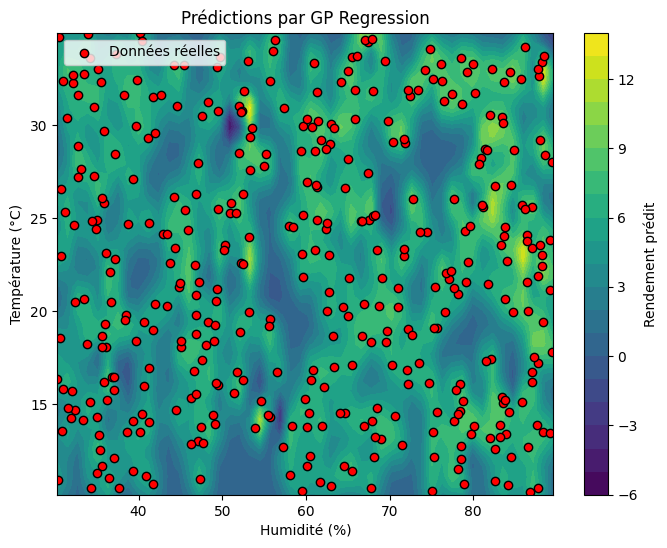

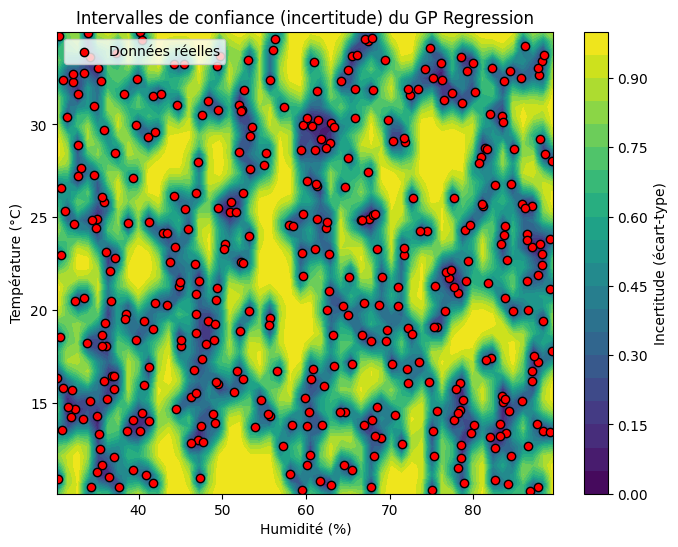

In [81]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier



# Définition des variables cibles
X = df[['Humidité (%)', 'Température (°C)']]

y = df['Rendement agricole (t/ha)'].values

# Définition d'un jeu d'entraînement et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# définition d'un noyau pour le gaussian process
kernel_rbf=RBF(length_scale=10,length_scale_bounds=(1e-2, 1e2))

gpr = GaussianProcessRegressor(kernel=kernel_rbf,n_restarts_optimizer=10,random_state=42)
gpr.fit(X_train,y_train)

# Création d'une grille pour visualiser les prédictions
humidity_range = np.linspace(df['Humidité (%)'].min(), df['Humidité (%)'].max(), 50)
temperature_range = np.linspace(df['Température (°C)'].min(), df['Température (°C)'].max(), 50)
H, T = np.meshgrid(humidity_range, temperature_range)
grid_points = np.c_[H.ravel(), T.ravel()]

# Convertir la grille en DataFrame avec les mêmes noms de colonnes
grid_df = pd.DataFrame(grid_points, columns=X.columns)

# Prédictions et estimation de l'incertitude (écart-type)
y_pred, sigma = gpr.predict(grid_df, return_std=True)
y_pred = y_pred.reshape(H.shape)
sigma = sigma.reshape(H.shape)

# Visualisation des prédictions (surface) et des intervalles de confiance
plt.figure(figsize=(8,6))
contour = plt.contourf(H, T, y_pred, cmap='viridis', levels=20)
plt.colorbar(contour, label='Rendement prédit')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c='red', label='Données réelles', edgecolor='k')
plt.xlabel('Humidité (%)')
plt.ylabel('Température (°C)')
plt.title('Prédictions par GP Regression')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
contour_std = plt.contourf(H, T, sigma, cmap='viridis', levels=20)
plt.colorbar(contour_std, label='Incertitude (écart-type)')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c='red', label='Données réelles', edgecolor='k')
plt.xlabel('Humidité (%)')
plt.ylabel('Température (°C)')
plt.title("Intervalles de confiance (incertitude) du GP Regression")
plt.legend()
plt.show()



1. Sur le premier graphique on a notre carte des prédictions, les couleurs chaudes indique la prédiction du rendenement plus élevé ce qui peut donner des indications climatiques optimale selon le modèle.
Les zones sombres indiquent des conditions moins favorables pour le rendement

2. Sur le second graphique nous avons la carte de l'incertitude,
 - Les zones a forte incertitude sont de couleurs claire et jaune
 - les zone de faible incertitude sont de couleurs sombres

#### Réalisation d'une classification bayésienne à noyau pour prédire le type de sol en fonction des données climatiques et Comparaison des résultats avec un SVM classique

#### Analyse de l'incertitude dans les prédictions et commentaire sur les zones les moins confiants

#### Test de différents noyaux ( linéaire, RBF, polynomial), différence entre eux et l'impact sur la prédiction du modèle

#### Discussion de l'influence des choix des noyau et de la distribution a priori sur les résultats


=== Classification Bayésienne (GPC) ===
Précision du GPC : 0.34
              precision    recall  f1-score   support

           0       0.34      1.00      0.51        51
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        48

    accuracy                           0.34       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.12      0.34      0.17       150



/home/laeky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/laeky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/laeky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== Classification SVM ===
Précision du SVM : 0.34
              precision    recall  f1-score   support

           0       0.34      1.00      0.51        51
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        48

    accuracy                           0.34       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.12      0.34      0.17       150



/home/laeky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/laeky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/laeky/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


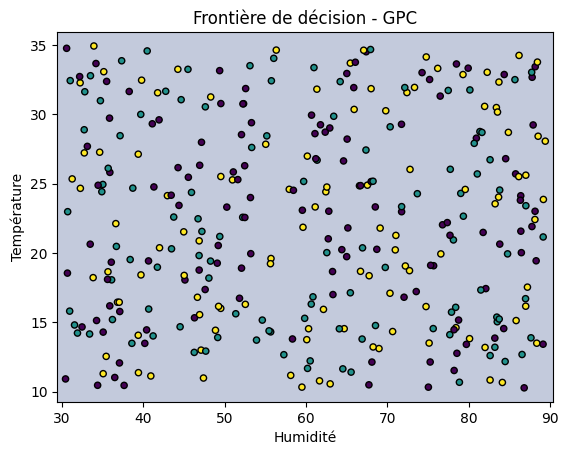

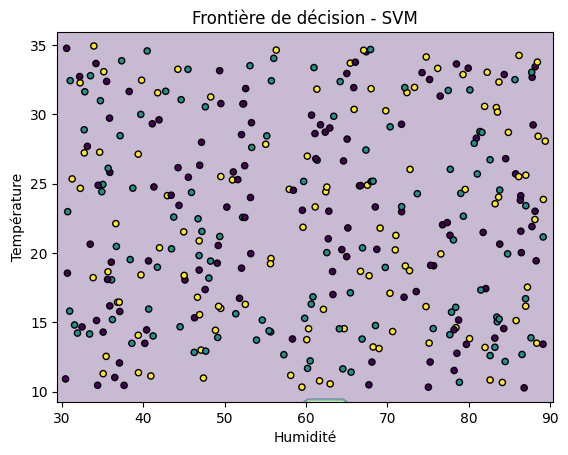

In [87]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
# Pour la classification, on suppose que la colonne 'Type de Sol' existe
if 'Type de sol' in df.columns:
    X_cls = df[['Humidité (%)', 'Température (°C)']].values
    y_cls = df['Type de sol'].values
    # Si les labels sont textuels, on les encode en numériques
    if y_cls.dtype == object:
        le = LabelEncoder()
        y_cls = le.fit_transform(y_cls)
else:
    print("La colonne 'Type de sol' n'est pas présente. La partie classification sera ignorée.")
    X_cls, y_cls = None, None
    
if X_cls is not None:
    # Division en ensembles d'entraînement et de test
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)
    
    # Modèle de classification par GP avec un noyau RBF
    kernel_cls = 1.0 * RBF(length_scale=1.0)
    gpc = GaussianProcessClassifier(kernel=kernel_cls, random_state=42)
    gpc.fit(X_train_cls, y_train_cls)
    y_pred_gpc = gpc.predict(X_test_cls)
    
    print("\n=== Classification Bayésienne (GPC) ===")
    print("Précision du GPC :", accuracy_score(y_test_cls, y_pred_gpc))
    print(classification_report(y_test_cls, y_pred_gpc))
    
    # Modèle SVM pour comparaison
    svc = SVC(probability=True, random_state=42)
    svc.fit(X_train_cls, y_train_cls)
    y_pred_svc = svc.predict(X_test_cls)
    
    print("\n=== Classification SVM ===")
    print("Précision du SVM :", accuracy_score(y_test_cls, y_pred_svc))
    print(classification_report(y_test_cls, y_pred_svc))
    
    # Visualisation des frontières de décision pour GPC et SVM
    def plot_decision_boundary(clf, X, y, title="Frontière de décision"):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
        plt.xlabel('Humidité')
        plt.ylabel('Température')
        plt.title(title)
        plt.show()
    
    plot_decision_boundary(gpc, X_train_cls, y_train_cls, title="Frontière de décision - GPC")
    plot_decision_boundary(svc, X_train_cls, y_train_cls, title="Frontière de décision - SVM")
else:
    print("La classification n'est pas réalisée car 'type_sol' est absent.")
